### [Apache Spark](https://spark.apache.org/)

Apache Spark é uma plataforma de computação em *cluster* que fornece uma API para programação distribuída para processamento de dados em larga escala, semelhante ao modelo *MapReduce*, mas projetada para ser rápida para consultas interativas e algoritmos iterativos.

O Spark permite que você distribua dados e tarefas em clusters com vários nós. Imagine cada nó como um computador separado. A divisão dos dados torna mais fácil o trabalho com conjuntos de dados muito grandes porque cada nó funciona processa apenas uma parte parte do volume total de dados.

O Spark é amplamente utilizado em projetos analíticos nas seguintes frentes:

- Preparação de dados
- Modelos de machine learning
- Análise de dados em tempo real

### [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

#### Spark SQL e DataFrame

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

#### Spark Streaming

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

#### Spark MLlib

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

#### Spark Core

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

#### Operações do PySpark

- **Transformação:** Produz um ou mais novos RDDs. 
    - **Exemplos de operação de Transformação:** map(func), flatMap(), filter(func), mapPartition(func), mapPartitionWithIndex(), union(dataSet), intersection(dataSet), distinct(), groupByKey(), reduceByKey(func), sortByKey(), join() e select().
    
    
- **Ação:** Produz um valor que pode ser armazenado ou lançado em algum buffer a partir do RDD original.
    - **Exemplo de operação do tipo Ação:** count(), collect(), take(n), top(n), countByValue(), reduce(), fold(), aggregate() e foreach().
    
Para entendermos o fluxo de operações, é importante saber que as operações de Transformação são **lazy** por natureza, ou seja, elas não são executadas quando são chamadas, elas são executadas somente quando uma operação de **Ação** é chamada ou trigada. Por tanto, as operações de **Transformação** nunca são executadas imediatamente.


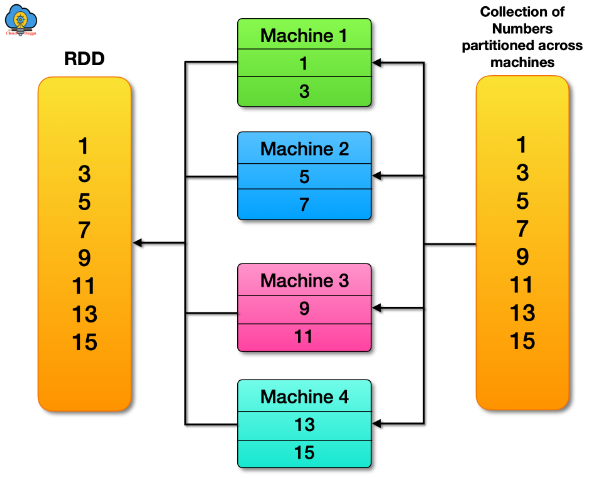

In [1]:
from IPython.display import Image
Image("/home/clayton/Dropbox/rdd.png")

In [2]:
!conda install pyspark -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
# Pacotes necessários para rodarmos o Spark
import findspark
findspark.find()
findspark.init()
import pyspark

# Iniciando a Sessão
---

## [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, fazemos da seguinte forma:

In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Ai2_PySpark") \
    .getOrCreate()

In [5]:
spark

## Vamos verificar então as funções do Pyspark no Dataframe
---

In [7]:
data = [("Clayton", 35), ("Lorena", 20)]
coluns = ['Nome', 'Idade']
df = spark.createDataFrame(data, coluns)
df.show()

+-------+-----+
|   Nome|Idade|
+-------+-----+
|Clayton|   35|
| Lorena|   20|
+-------+-----+



In [8]:
df.toPandas()

,Nome,Idade
0,Clayton,35
1,Lorena,20


## Criando funções pelo PySpark
---

- Imagine que queremos o total de vendas de um determinado produto (no nosso caso, Pão)

In [9]:
# Criando um dataframe

schema = "Produtos STRING, Vendas INT"
vendas = [["Pao",10],["Manteiga",2],["Pao",5]]
df = spark.createDataFrame(vendas,schema)
df.show()

+--------+------+
|Produtos|Vendas|
+--------+------+
|     Pao|    10|
|Manteiga|     2|
|     Pao|     5|
+--------+------+



In [10]:
# Informações do Dataframe

df.schema

StructType(List(StructField(Produtos,StringType,true),StructField(Vendas,IntegerType,true)))

In [11]:
# Informações do Dataframe

df.columns

['Produtos', 'Vendas']

In [12]:
# Agrupando dados
from pyspark.sql.functions import sum 

agrupado = df.groupBy("Produtos").agg(sum("Vendas"))
agrupado.show()

+--------+-----------+
|Produtos|sum(Vendas)|
+--------+-----------+
|     Pao|         15|
|Manteiga|          2|
+--------+-----------+



In [13]:
df.select("Vendas","Produtos").show()

+------+--------+
|Vendas|Produtos|
+------+--------+
|    10|     Pao|
|     2|Manteiga|
|     5|     Pao|
+------+--------+



## Porcentagem de vendas

In [14]:
# Importando a biblioteca de funções do sql

from pyspark.sql.functions import expr

In [15]:
# Calculando 20% das vendas

df.select("Produtos", "Vendas", expr("Vendas * 0.2")).show()

+--------+------+--------------+
|Produtos|Vendas|(Vendas * 0.2)|
+--------+------+--------------+
|     Pao|    10|           2.0|
|Manteiga|     2|           0.4|
|     Pao|     5|           1.0|
+--------+------+--------------+



In [16]:
df.select("Produtos", "Vendas", expr("Vendas - 0.2")).show()

+--------+------+--------------+
|Produtos|Vendas|(Vendas - 0.2)|
+--------+------+--------------+
|     Pao|    10|           9.8|
|Manteiga|     2|           1.8|
|     Pao|     5|           4.8|
+--------+------+--------------+



## Trabalhando com Bando de dados

In [18]:
# Importando a bibliotecas para leitura de dados

from pyspark.sql.types import *

In [19]:
arq_schema = "Id INT, Nome STRING, Status STRING, Cidade STRING, Vendas INT, Data STRING"
despachantes = spark.read.csv("/home/clayton/download/despachantes.csv", header=False, schema=arq_schema)
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [20]:
despachantes.toPandas()

,Id,Nome,Status,Cidade,Vendas,Data
0,1,Carminda Pestana,Ativo,Santa Maria,23,2020-08-11
1,2,Deolinda Vilela,Ativo,Novo Hamburgo,34,2020-03-05
2,3,Emídio Dornelles,Ativo,Porto Alegre,34,2020-02-05
3,4,Felisbela Dornelles,Ativo,Porto Alegre,36,2020-02-05
4,5,Graça Ornellas,Ativo,Porto Alegre,12,2020-02-05
5,6,Matilde Rebouças,Ativo,Porto Alegre,22,2019-01-05
6,7,Noêmia Orriça,Ativo,Santa Maria,45,2019-10-05
7,8,Roque Vásquez,Ativo,Porto Alegre,65,2020-03-05
8,9,Uriel Queiroz,Ativo,Porto Alegre,54,2018-05-05
9,10,Viviana Sequeira,Ativo,Porto Alegre,0,2020-09-05


In [21]:
desp_autoschema = spark.read.load("/home/clayton/download/despachantes.csv", header=False, format="csv", sep=",",inferSchema=True)
desp_autoschema.show()

+---+-------------------+-----+-------------+---+----------+
|_c0|                _c1|  _c2|          _c3|_c4|       _c5|
+---+-------------------+-----+-------------+---+----------+
|  1|   Carminda Pestana|Ativo|  Santa Maria| 23|2020-08-11|
|  2|    Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05|
|  3|   Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05|
|  4|Felisbela Dornelles|Ativo| Porto Alegre| 36|2020-02-05|
|  5|     Graça Ornellas|Ativo| Porto Alegre| 12|2020-02-05|
|  6|   Matilde Rebouças|Ativo| Porto Alegre| 22|2019-01-05|
|  7|    Noêmia   Orriça|Ativo|  Santa Maria| 45|2019-10-05|
|  8|      Roque Vásquez|Ativo| Porto Alegre| 65|2020-03-05|
|  9|      Uriel Queiroz|Ativo| Porto Alegre| 54|2018-05-05|
| 10|   Viviana Sequeira|Ativo| Porto Alegre|  0|2020-09-05|
+---+-------------------+-----+-------------+---+----------+



In [22]:
# Reconhecendo os dados com Schema

despachantes.schema

StructType(List(StructField(Id,IntegerType,true),StructField(Nome,StringType,true),StructField(Status,StringType,true),StructField(Cidade,StringType,true),StructField(Vendas,IntegerType,true),StructField(Data,StringType,true)))

In [23]:
desp_autoschema.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,IntegerType,true),StructField(_c5,StringType,true)))

## BD com PySpark


<center><img src="https://dwgeek.com/wp-content/uploads/2019/01/Spark-SQL-Performance-Tuning.jpg"/></center>

- Buscas utilizando comandos de SQL

In [24]:
from pyspark.sql.types import *

In [28]:
# Vamos visualizar nosso banco de dados que vem com o Hide: Temos apenas o banco default

spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|      ai2|
|  default|
+---------+



In [26]:
# Criando nosso BD

spark.sql("create database Ai2")

DataFrame[]

In [27]:
# Setando o BD

spark.sql("use Ai2").show()

++
||
++
++



In [29]:
# Lendo o dataset

arqschema = "Id INT, Nome STRING, Status STRING, Cidade STRING, Vendas INT, Data STRING"
despa = spark.read.csv("/home/clayton/download/despachantes.csv", header=False, schema=arqschema)
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [30]:
despa.toPandas()

,Id,Nome,Status,Cidade,Vendas,Data
0,1,Carminda Pestana,Ativo,Santa Maria,23,2020-08-11
1,2,Deolinda Vilela,Ativo,Novo Hamburgo,34,2020-03-05
2,3,Emídio Dornelles,Ativo,Porto Alegre,34,2020-02-05
3,4,Felisbela Dornelles,Ativo,Porto Alegre,36,2020-02-05
4,5,Graça Ornellas,Ativo,Porto Alegre,12,2020-02-05
5,6,Matilde Rebouças,Ativo,Porto Alegre,22,2019-01-05
6,7,Noêmia Orriça,Ativo,Santa Maria,45,2019-10-05
7,8,Roque Vásquez,Ativo,Porto Alegre,65,2020-03-05
8,9,Uriel Queiroz,Ativo,Porto Alegre,54,2018-05-05
9,10,Viviana Sequeira,Ativo,Porto Alegre,0,2020-09-05


In [48]:
# Listando tabelas do BD

spark.sql("show tables").show()

+---------+---------------+-----------+
|namespace|      tableName|isTemporary|
+---------+---------------+-----------+
|      ai2|   despachantes|      false|
|      ai2|despachantes_ng|      false|
+---------+---------------+-----------+



In [33]:
# Transformando Dataframe em tabela no BD

despa.write.saveAsTable("Despachantes")

### Gerenciando Tabelas

In [35]:
# Realizando uma consulta no BD

spark.sql("select * from despachantes").show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [36]:
# Setando o BD

spark.sql("use Ai2").show()

++
||
++
++



In [41]:
# Reescrevendo a tabela

despa.write.mode("overwrite").saveAsTable("Despachantes")

In [40]:
# Salvando o parquet

despachantes.write.format("parquet").save("/home/clayton/Dropbox/spark-warehouse/ai2.db/despachantes/desp_parquet")

### Tabelas não Gerenciadas

In [45]:
# Criando path

despachantes.write.option("path","/home/clayton/Dropbox/spark-warehouse/ai2.db/despachantes/desp_parquet").saveAsTable("Despachantes_ng")

AnalysisException: Table `Despachantes_ng` already exists.

In [46]:
# Caso dê erro na gravação do path, utilizemos o comando a seguir para solucionar o problema

spark.conf.set("spark.sql.legacy.allowNonEmptyLocationInCTAS", "true")

In [47]:
spark.sql("select * from despachantes_ng").show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [49]:
# Forma 1: Verificar se existe um caminho físico (Tabela externa, não gerenciada)

spark.sql("show create table Despachantes").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|createtab_stmt                                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+
|CREATE TABLE `ai2`.`Despachantes` (\n  `Id` INT,\n  `Nome` STRING,\n  `Status` STRING,\n  `Cidade` STRING,\n  `Vendas` INT,\n  `Data` STRING)\nUSING parquet\n|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------+



In [50]:
# Apresentando path da outra tabela


spark.sql("show create table Despachantes_ng").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|createtab_stmt                                                                                                                                                                                                                                           |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|CREATE TABLE `ai2`.`Despachantes_ng` (\n  `Id` INT,\n  `Nome` STRING,\n  `Status` STRING,\n  `Cidade` STRING,\n  `Vendas` INT,\n  `Data` STRING)\nUSING parquet\nLOCATION 'file:/home/clayton/Dropbox/spark-warehouse/ai2.db/despachantes/desp_parq

In [51]:
# Forma 2: Através do Catalog

spark.catalog.listTables()

[Table(name='despachantes', database='ai2', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='despachantes_ng', database='ai2', description=None, tableType='EXTERNAL', isTemporary=False)]

## Criando Views

- Sabemos o path das nossas tabelas externas (não gerenciadas), mas e as tabelas não gerenciadas??

In [52]:
!ls /home/clayton/spark-warehouse/

desp.db


In [53]:
spark.sql("CREATE OR REPLACE TEMP VIEW SQL_VIEW AS select * from despachantes")

DataFrame[]

In [54]:
spark.sql("select * from SQL_VIEW").show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [55]:
# Criando View com SQL

spark.sql("CREATE OR REPLACE GLOBAL TEMP VIEW SQL_VIEW2 AS select * from despachantes")

DataFrame[]

In [56]:
spark.sql("select * from global_temp.SQL_VIEW2").show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [57]:
# Criando View através do Replace

despachantes.createOrReplaceTempView("despachantes_view1")

In [58]:
spark.sql("select * from despachantes_view1").show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [63]:
# Listando as tabelas e Views

spark.sql("show tables").show()

+---------+------------------+-----------+
|namespace|         tableName|isTemporary|
+---------+------------------+-----------+
|      ai2|      despachantes|      false|
|      ai2|   despachantes_ng|      false|
|         |despachantes_view1|       true|
+---------+------------------+-----------+



In [62]:
# Dropando tables

spark.catalog.dropTempView("sql_view")

## Comparando Dataframe com Tabelas SQL

In [64]:
# Importando as bibs

from pyspark.sql import functions as func
from pyspark.sql.functions import *

In [65]:
spark.sql("select * from Despachantes").show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [66]:
# select na API

despachantes.show()

+---+-------------------+------+-------------+------+----------+
| Id|               Nome|Status|       Cidade|Vendas|      Data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [67]:
spark.sql("select Nome, Cidade from Despachantes").show()

+-------------------+-------------+
|               Nome|       Cidade|
+-------------------+-------------+
|   Carminda Pestana|  Santa Maria|
|    Deolinda Vilela|Novo Hamburgo|
|   Emídio Dornelles| Porto Alegre|
|Felisbela Dornelles| Porto Alegre|
|     Graça Ornellas| Porto Alegre|
|   Matilde Rebouças| Porto Alegre|
|    Noêmia   Orriça|  Santa Maria|
|      Roque Vásquez| Porto Alegre|
|      Uriel Queiroz| Porto Alegre|
|   Viviana Sequeira| Porto Alegre|
+-------------------+-------------+



In [68]:
despachantes.select("Nome", "Cidade").show()

+-------------------+-------------+
|               Nome|       Cidade|
+-------------------+-------------+
|   Carminda Pestana|  Santa Maria|
|    Deolinda Vilela|Novo Hamburgo|
|   Emídio Dornelles| Porto Alegre|
|Felisbela Dornelles| Porto Alegre|
|     Graça Ornellas| Porto Alegre|
|   Matilde Rebouças| Porto Alegre|
|    Noêmia   Orriça|  Santa Maria|
|      Roque Vásquez| Porto Alegre|
|      Uriel Queiroz| Porto Alegre|
|   Viviana Sequeira| Porto Alegre|
+-------------------+-------------+



In [70]:
# buscando vendas > 20 com API

despachantes.select("Nome", "Vendas").where(func.col("Vendas") > 20).show()

+-------------------+------+
|               Nome|Vendas|
+-------------------+------+
|   Carminda Pestana|    23|
|    Deolinda Vilela|    34|
|   Emídio Dornelles|    34|
|Felisbela Dornelles|    36|
|   Matilde Rebouças|    22|
|    Noêmia   Orriça|    45|
|      Roque Vásquez|    65|
|      Uriel Queiroz|    54|
+-------------------+------+



In [71]:
# buscando vendas > 20 com SQL

spark.sql("select Nome, Vendas from Despachantes where Vendas > 20").show()

+-------------------+------+
|               Nome|Vendas|
+-------------------+------+
|   Carminda Pestana|    23|
|    Deolinda Vilela|    34|
|   Emídio Dornelles|    34|
|Felisbela Dornelles|    36|
|   Matilde Rebouças|    22|
|    Noêmia   Orriça|    45|
|      Roque Vásquez|    65|
|      Uriel Queiroz|    54|
+-------------------+------+



In [72]:
# Total de vendas por cidade

spark.sql("select Cidade, sum(Vendas) from Despachantes group by Cidade order by 2 desc").show()

+-------------+-----------+
|       Cidade|sum(Vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+



In [73]:
despachantes.groupby("Cidade").agg(sum("Vendas")).orderBy(func.col("sum(Vendas)").desc()).show()

+-------------+-----------+
|       Cidade|sum(Vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+

